### Load the Dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Performing Below Visualizations

#### Univariate Analysis

In [4]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

<AxesSubplot:xlabel='Exited', ylabel='count'>

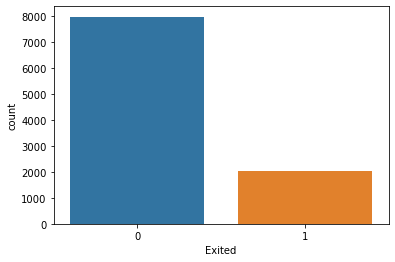

In [5]:
sns.countplot(x='Exited',data=df)

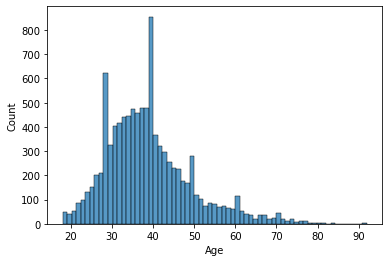

In [6]:
sns.histplot(x='Age', data=df);

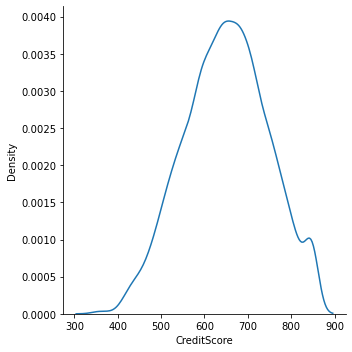

In [7]:
sns.displot(df.CreditScore,kind='kde')

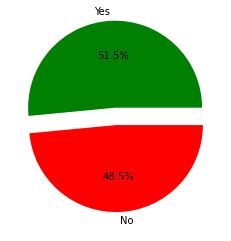

In [8]:
plt.pie(df.IsActiveMember.value_counts(),[0.2,0],colors=['green','red'],labels=['Yes','No'],autopct="%1.1f%%")
plt.show()

#### Bivariate Analysis

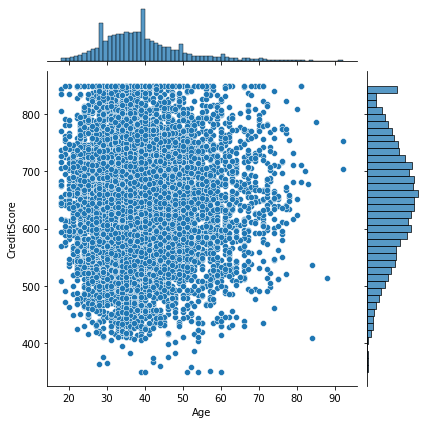

In [9]:
sns.jointplot(x=df.Age,y=df.CreditScore)

<AxesSubplot:xlabel='IsActiveMember', ylabel='Exited'>

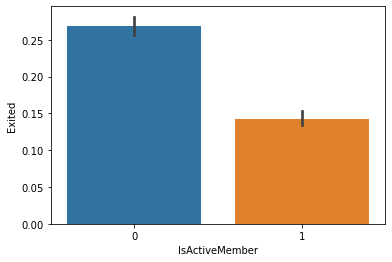

In [10]:
sns.barplot(x=df.IsActiveMember,y=df.Exited)

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

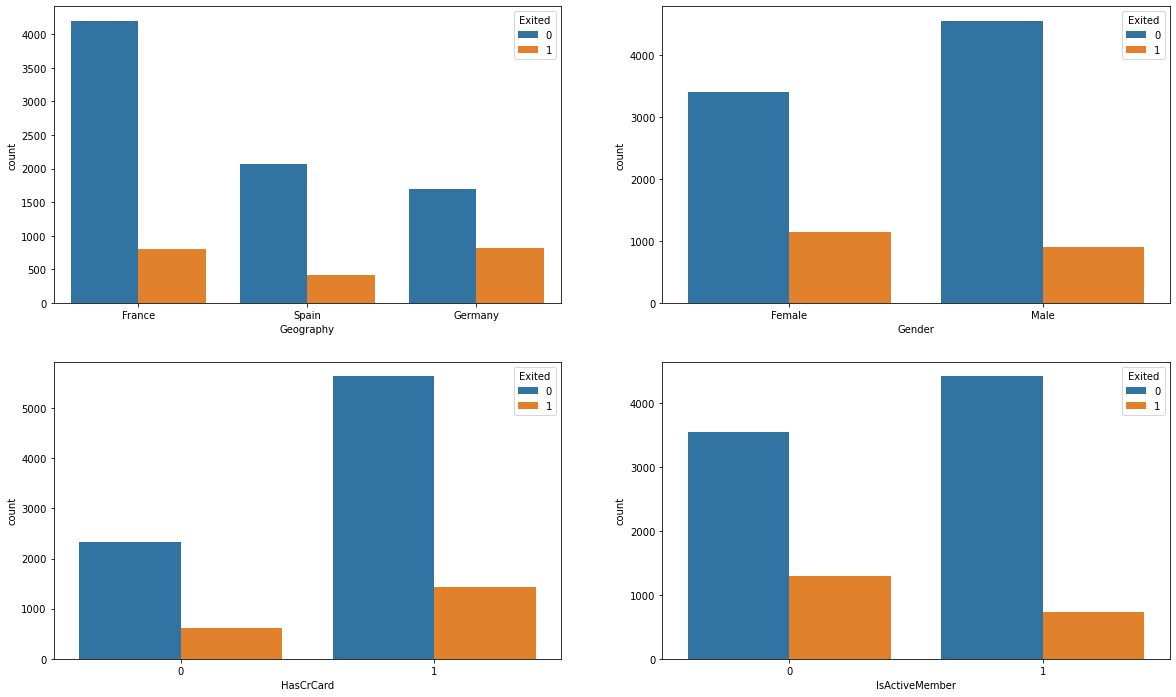

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=ax[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=ax[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=ax[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=ax[1][1])

#### Multivariate Analysis

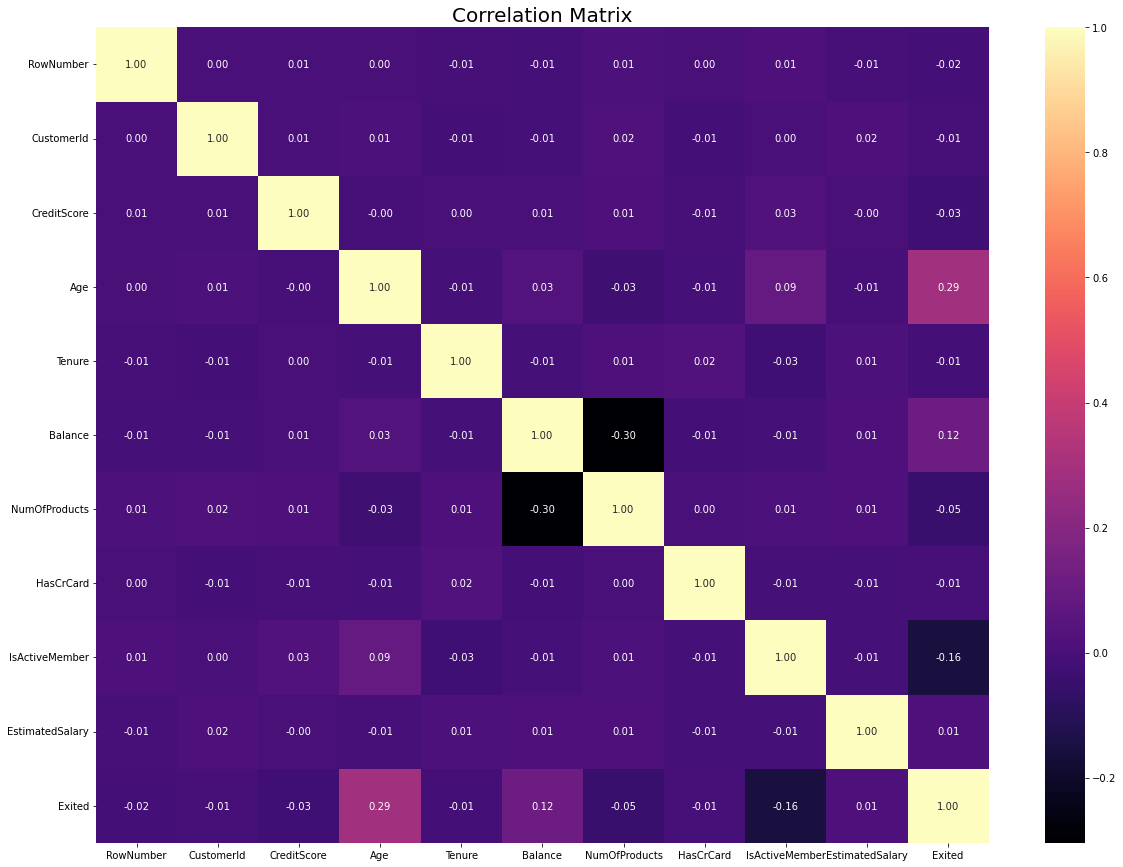

In [12]:
f, ax = plt.subplots(figsize= [20,15])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

### Descriptive Statistics

In [13]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [14]:
df.mean(numeric_only=True)

RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505288e+02
Age                3.892180e+01
Tenure             5.012800e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
HasCrCard          7.055000e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64

In [15]:
df.Age.quantile([0.25,0.5,0.75])

0.25    32.0
0.50    37.0
0.75    44.0
Name: Age, dtype: float64

In [16]:
df.max()

RowNumber              10000
CustomerId          15815690
Surname               Zuyeva
CreditScore              850
Geography              Spain
Gender                  Male
Age                       92
Tenure                    10
Balance            250898.09
NumOfProducts              4
HasCrCard                  1
IsActiveMember             1
EstimatedSalary    199992.48
Exited                     1
dtype: object

### Handling Missing Values

In [17]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

### Finding And Replacing The Outliers

#### Outliers Removal - IQR Method

<AxesSubplot:xlabel='CreditScore'>

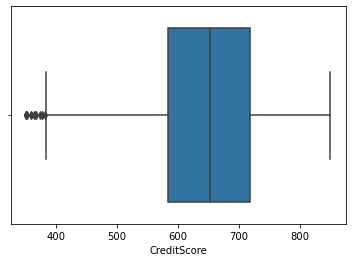

In [18]:
sns.boxplot(x=df.CreditScore)

In [19]:
Q1=df.CreditScore.quantile(0.25)
Q3=df.CreditScore.quantile(0.75)

In [20]:
IQR=Q3-Q1

In [21]:
upper_limit=Q3 + 1.5*IQR
lower_limit=Q1 - 1.5*IQR

In [22]:
lower_limit

383.0

In [23]:
df=df[df.CreditScore>lower_limit]

<AxesSubplot:xlabel='CreditScore'>

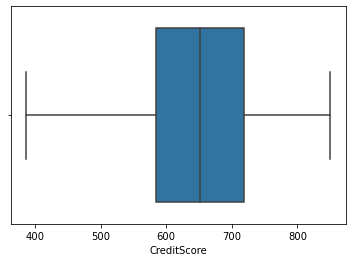

In [24]:
sns.boxplot(x=df.CreditScore)

In [25]:
df.shape

(9984, 14)

#### Outliers Replacement Using Median

<AxesSubplot:xlabel='NumOfProducts'>

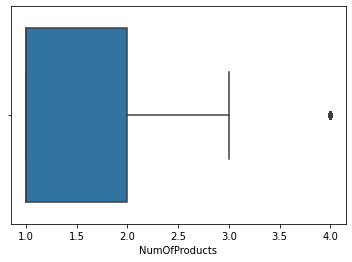

In [26]:
sns.boxplot(x=df.NumOfProducts)

In [27]:
df.NumOfProducts.median()

1.0

In [28]:
Q1=df.NumOfProducts.quantile(0.25)
Q3=df.NumOfProducts.quantile(0.75)

In [29]:
IQR=Q3-Q1

In [30]:
upper_limit=Q3 + 1.5*IQR
lower_limit=Q1 - 1.5*IQR

In [31]:
df['NumOfProducts']=np.where(df['NumOfProducts']>upper_limit,1.0,df['NumOfProducts'])

<AxesSubplot:xlabel='NumOfProducts'>

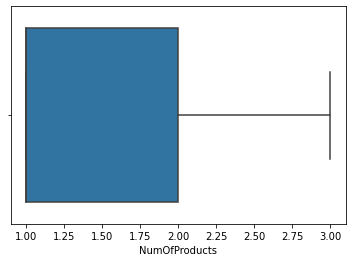

In [32]:
sns.boxplot(x=df.NumOfProducts)

In [33]:
df.shape

(9984, 14)

### Checking For Categorical Columns And Performing Encoding

#### Label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le=LabelEncoder()
df['Surname'] = le.fit_transform(df['Surname'])

In [36]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1114,619,France,Female,42,2,0.00,1.0,1,1,101348.88,1
1,2,15647311,1176,608,Spain,Female,41,1,83807.86,1.0,0,1,112542.58,0
2,3,15619304,2039,502,France,Female,42,8,159660.80,3.0,1,0,113931.57,1
3,4,15701354,288,699,France,Female,39,1,0.00,2.0,0,0,93826.63,0
4,5,15737888,1821,850,Spain,Female,43,2,125510.82,1.0,1,1,79084.10,0


#### One Hot Encoding

In [37]:
non_ordinal_categories = ['Geography','Gender']
df = pd.get_dummies(df, columns = non_ordinal_categories)

In [38]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,1114,619,42,2,0.00,1.0,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,1176,608,41,1,83807.86,1.0,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,2039,502,42,8,159660.80,3.0,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,288,699,39,1,0.00,2.0,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,1821,850,43,2,125510.82,1.0,1,1,79084.10,0,0,0,1,1,0


### Splitting The Data Into Dependent And Independent Variables

In [39]:
X=df.drop(columns=['RowNumber', 'CustomerId', 'Surname', 'Exited']) 
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1.0,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1.0,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3.0,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2.0,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1.0,1,1,79084.10,0,0,1,1,0


In [40]:
Y=df.Exited
Y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 9984, dtype: int64

### Scaling The Independent Variables

In [41]:
from sklearn.preprocessing import scale

In [42]:
X_scaled=pd.DataFrame(scale(X),columns=X.columns)
X_scaled.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.333109,0.294242,-1.042394,-1.225576,-0.931504,0.646358,0.969418,0.022940,0.99680,-0.578738,-0.573495,1.096371,-1.096371
1,-0.447651,0.198886,-1.388254,0.117612,-0.931504,-1.547130,0.969418,0.217552,-1.00321,-0.578738,1.743694,1.096371,-1.096371
2,-1.551418,0.294242,1.032764,1.333306,2.703491,0.646358,-1.031547,0.241700,0.99680,-0.578738,-0.573495,1.096371,-1.096371
3,0.499922,0.008175,-1.388254,-1.225576,0.885994,-1.547130,-1.031547,-0.107840,0.99680,-0.578738,-0.573495,1.096371,-1.096371
4,2.072269,0.389597,-1.042394,0.785985,-0.931504,0.646358,0.969418,-0.364151,-1.00321,-0.578738,1.743694,1.096371,-1.096371


### Splitting The Data Into Training And Testing

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_scaled, Y, test_size=0.3, random_state=0) 
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6988, 13), (2996, 13), (6988,), (2996,))